# Nancy Grace Roman Space Telescope<br>Solve for Reference Pixel  Weights

Bernard J. Rauscher
NASA Goddard Space Flight Center

18 March 2021; Revised 15 April 2021

e-Mail: Bernard.J.Rauscher@nasa.gov

## 1. INTRODUCTION

This notebook shows to to compute the Linear Algebra Machine Learning (LAML) frequency dependent weights for the reference pixels in columns.

## 2. COMPUTING THE FREQUENCY DEPENDENT WEIGHTS

Here is the computation with running commentary.

In [1]:
# Load standard packages
using Revise
using Glob
using Plots
using FITSIO
using LaTeXStrings
using JLD
using StatsBase
using LinearAlgebra

# Load my packages
using SIRS

┌ Info: Precompiling SIRS [40ae95f3-0455-409b-a0fb-071cca222575]
└ @ Base loading.jl:1278


In [2]:
# This assumes that you are working on an ADAPT Prism node
# and have staged the input files in the /lscratch directory.
ddir = "/att/gpfsfs/briskfs01/project/wfirst/H4RG/HyC/20663_20666_20669_20496/"  # Data are here
rdir = "/att/gpfsfs/home/brausche/tmp/"; # Results go here

In [4]:
# Make a list of the input files. The order does not matter for this.
files = glob("*_95k_1p1m0p1_noise_20663_*.fits", ddir);

In [8]:
?SIRSCore

search: SIRSCore



```
SIRSCore(hxrg_kind, nout, nroh, τ, naxis3; gdpx=nothing, restore=false)
```

Simple Improved Reference Subtraction (SIRS) core structure. This contains the information that is needed to compute the SIRS alpha and beta vectors from a set of up-the-ramp sampled darks.

```
Parameters: hxrg_kind::String
              Selected from {"h4rg","h2rg"}
            nout::Int64
              Number of SCA outputs.
            nroh::Int64
              New row overhead in pixels.
            τ::Float64
              Pixel dwell time in seconds. For 200 kHz clocking,
              set τ=5.e-6. For 100 kHz clocking, set
              τ=10.e-6.
            naxis3::Int64
              Number of up-the-ramp samples. 
            gdpx::BitArray{2} (optional)
              The detector's good pixel map. Good pixels are =1. Bad pixels
              and reference pixels are =0.
            restore::Bool (optional)
              Set this true when restoreing a saved SIRSCore.
```


In [9]:
# Instantiate a SIRSCore structure. From looking at the FITS headers,
# I know that the data have 60 samples up-the-ramp.
sc = SIRSCore("h4rg", 32, 7, 5.e-6, 60);

In [10]:
# This cell can be very time consuming. The execution time on
# Prism with 40 cores enabled is about 65 seconds/file.

clear!(sc) # Preemptively clear SIRScore. Sometimes I run this cell more than once.
for file in files[1:10]
    
    # Show some status
    println("Processing file: ", file)
   
    # Work with ADAPT format files.
    # Don't worry about DCL format for now.
    f = FITS(file, "r")
    D = Float64.(dropdims(read(f[2]), dims=4))
    close(f)
    
    # Coadd
    coadd!(sc, D)

end

Processing file: /att/gpfsfs/briskfs01/project/wfirst/H4RG/HyC/20663_20666_20669_20496/20190914_95k_1p1m0p1_noise_20663_001.fits
Processing frame 1
Processing frame 2
Processing frame 3
Processing frame 4
Processing frame 5
Processing frame 6
Processing frame 7
Processing frame 8
Processing frame 9
Processing frame 10
Processing frame 11
Processing frame 12
Processing frame 13
Processing frame 14
Processing frame 15
Processing frame 16
Processing frame 17
Processing frame 18
Processing frame 19
Processing frame 20
Processing frame 21
Processing frame 22
Processing frame 23
Processing frame 24
Processing frame 25
Processing frame 26
Processing frame 27
Processing frame 28
Processing frame 29
Processing frame 30
Processing frame 31
Processing frame 32
Processing frame 33
Processing frame 34
Processing frame 35
Processing frame 36
Processing frame 37
Processing frame 38
Processing frame 39
Processing frame 40
Processing frame 41
Processing frame 42
Processing frame 43
Processing frame 44


In [11]:
# Solve for alpha and beta
solve!(sc);

In [15]:
# Save results
output_filename = rdir * "sirs_test.jld"
SIRS.save(sc, output_filename)

Make some plots showing the behavior at low and high frequency.

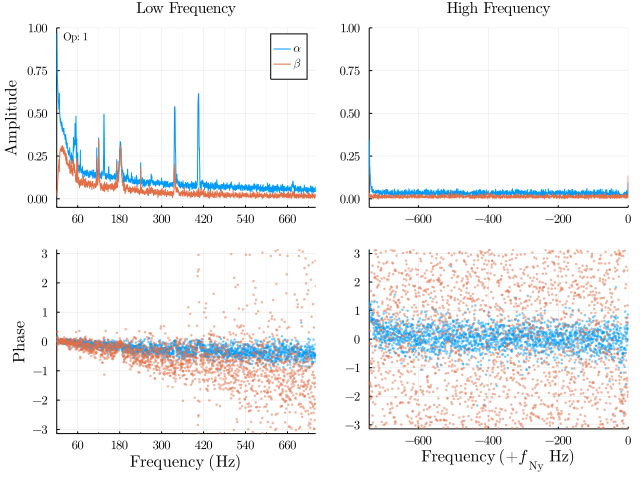

In [17]:
wplot(sc, 1, nice=true) # Nice puts ticks at 60 Hz intervals